use suffled3.csv

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [6]:
df1=pd.read_csv('suffled3.csv',parse_dates=['Date'], index_col='Date' )

In [26]:
df=pd.read_csv('suffled3.csv')


In [25]:
df['Date']=pd.to_datetime(df['Date'], dayfirst=True)

In [6]:
df.sort_values(by='Date', ascending = False).reset_index()
df

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2020-07-28,306.637012,308.326758,304.181926,304.480103,2116300,0.0,0.0
1,2015-09-17,89.160056,91.267558,89.140805,89.698959,4627000,0.0,0.0
2,2021-07-12,374.526799,375.595456,371.610470,375.086090,2648300,0.0,0.0
3,2017-03-17,109.891268,110.524228,109.803631,109.871796,4119200,0.0,0.0
4,2007-08-22,13.291884,13.592761,13.205919,13.532025,26579000,0.0,0.0
...,...,...,...,...,...,...,...,...
3867,2015-02-24,86.832303,87.887139,86.535026,87.570686,5547500,0.0,0.0
3868,2009-03-18,15.020868,15.132600,14.796466,14.999273,28081000,0.0,0.0
3869,2009-10-21,21.024157,21.854430,21.024157,21.243492,14613000,0.0,0.0
3870,2009-03-26,15.675295,16.094055,15.485633,15.950400,36507000,0.0,0.0


In [7]:
pivot =pd.pivot_table(df, values=('Open','High','Low','Close','Volume','Dividends','Stock Splits'), 
                        index=['Date'])
pivot.sort_values(by=['Date'], ascending=False)

,Close,Dividends,High,Low,Open,Stock Splits,Volume
Date,,,,,,,
2021-10-11,347.149994,0.00,354.880005,346.899994,353.950012,0.0,2766800
2021-10-08,354.959991,0.00,360.369995,354.209991,356.000000,0.0,2336700
2021-10-07,353.910004,0.44,357.899994,349.000000,349.000000,0.0,3209200
2021-10-06,348.250000,0.00,348.439763,338.682072,339.580960,0.0,3712000
2021-10-05,342.776886,0.00,348.130138,342.497241,347.121403,0.0,4724100
...,...,...,...,...,...,...,...
2006-06-01,4.419686,0.00,4.474572,4.176887,4.179678,0.0,62344000
2006-05-31,4.180608,0.00,4.219679,4.125723,4.125723,0.0,30002000
2006-05-30,4.093164,0.00,4.184330,3.986184,4.183400,0.0,49898000


In [8]:
df.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,3872.000000,3872.000000,3872.000000,3872.000000,3.872000e+03,3872.000000,3872.000000
mean,104.896814,105.956054,103.769349,104.882714,1.232250e+07,0.002329,0.002583
std,106.245511,107.303589,105.050064,106.168693,1.759665e+07,0.025851,0.160706
min,3.748967,4.102467,3.739664,4.083861,6.411000e+05,0.000000,0.000000
25%,22.347203,22.637997,22.034458,22.300391,3.529475e+06,0.000000,0.000000
50%,70.810079,71.375896,70.224002,70.856083,5.891750e+06,0.000000,0.000000
75%,147.688448,148.645373,146.822013,147.688438,1.319775e+07,0.000000,0.000000
max,392.653890,400.521479,389.747812,394.685730,3.953430e+08,0.440000,10.000000


<AxesSubplot:>

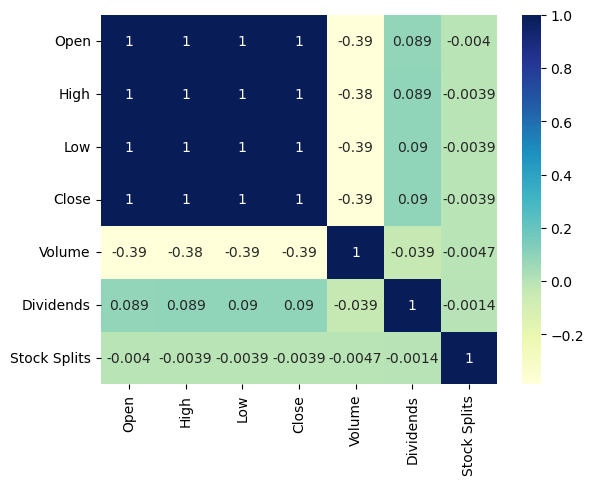

In [9]:


sns.heatmap(df.corr(), cmap = "YlGnBu", annot = True)



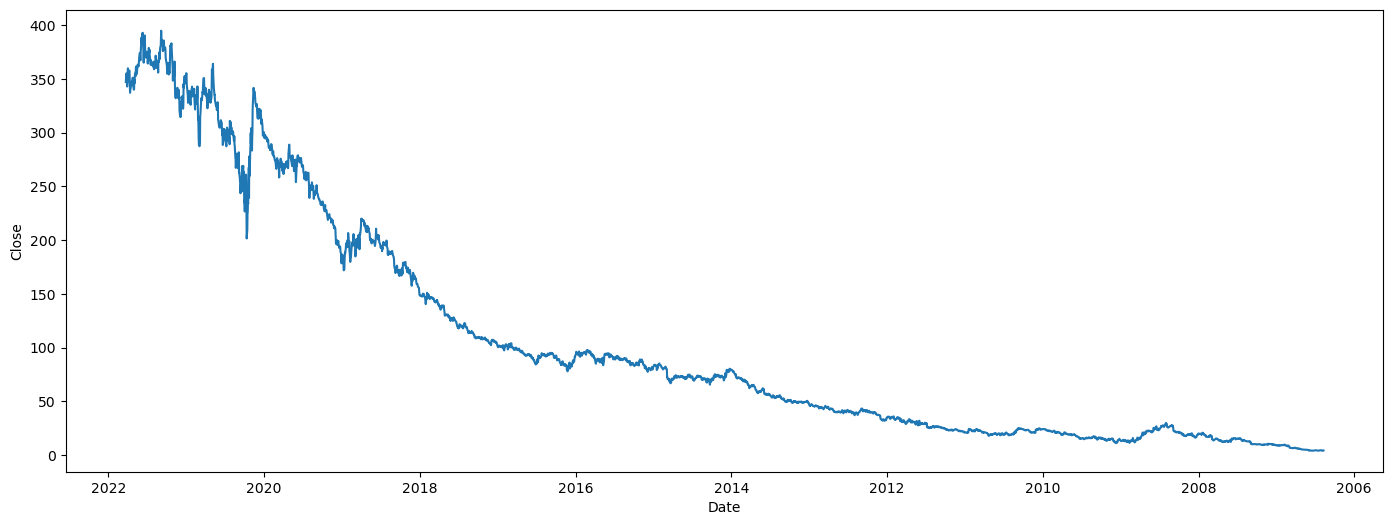

In [10]:
plt.figure(figsize=(17,6))
g=sns.lineplot(data=df, x="Date", y="Close")
plt.gca().invert_xaxis()

In [7]:
from sklearn.linear_model import LinearRegression

In [8]:
X = df1.drop(columns=["Close"]).values
Y= df1["Close"].values


In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y ,test_size=.2)

In [10]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler
pip_model=make_pipeline(MinMaxScaler() , LinearRegression())

In [11]:
pip_model.fit(X_train, y_train)
y_predict= pip_model.predict(X_test)

In [13]:
from sklearn.metrics import mean_squared_error , mean_absolute_error , mean_absolute_percentage_error , r2_score
from math import sqrt
print("MSE:", mean_squared_error(y_test, y_predict))
print("RMSE:", sqrt(mean_squared_error(y_test, y_predict)))
print("Mean Absolute Error:", mean_absolute_error(y_test, y_predict))
print("R2:", r2_score(y_test, y_predict))
print("Mean Absolute Percentage Error (MAPE):" , mean_absolute_percentage_error(y_true= y_test, y_pred= y_predict))

MSE: 0.8514779996237624
RMSE: 0.9227556554276773
Mean Absolute Error: 0.47291476554916806
R2: 0.9999250617778289
Mean Absolute Percentage Error (MAPE): 0.005699214644247313


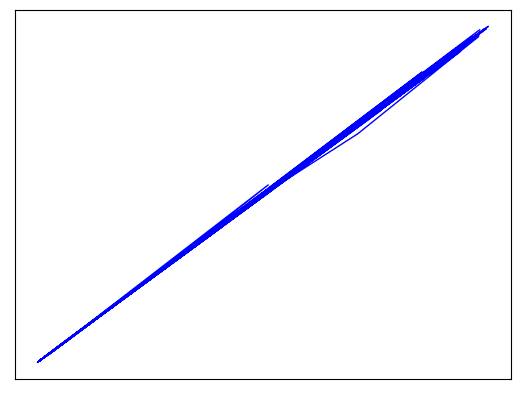

In [25]:
plt.plot(y_test, y_predict, color="blue", linewidth=1)
plt.xticks(())
plt.yticks(())

plt.show()

<AxesSubplot:>

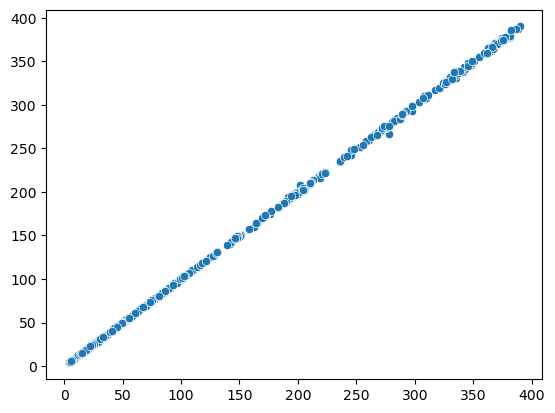

In [24]:
sns.scatterplot(x=y_test, y=y_predict )

<AxesSubplot:ylabel='Count'>

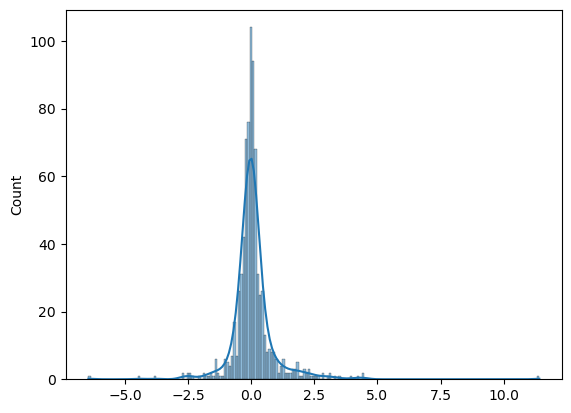

In [26]:
sns.histplot(y_test - y_predict, kde=True)

2- write run postgress docker command
and save y predicted labeles with datatime in database

docker run --name Sara -e POSTGRES_DB=Q7 -e POSTGRES_USER=sara -e POSTGRES_PASSWORD=1234 -p 5432:5432 -d postgres

In [ ]:
import psycopg2
import psycopg2.extras
import pandas as pd


conn = psycopg2.connect(
    host="localhost",
    dbname="Q7",
    user="sara",
    password="1234")
cursor= postgresConnection.cursor()
name_Table= "stock"
sqlCreateTable = "create table "+name_Table+" (date int, y_predict INT)"

# Create a table in PostgreSQL database

cursor.execute(sqlCreateTable)

postgresConnection.commit()


In [ ]:
cur.execute(f"INSERT INTO y_predict (y) VALUES ({y_predict})")
conn.commit()

3- scrape  https://api.divar.ir/v8/web-search/tehran/buy-apartment?districts=992 api to find token then use https://api.divar.ir/v5/posts/{token} api and save apartment price and location property in json file

In [42]:
import requests
import json
url= requests.request("GET", url = "https://api.divar.ir/v8/web-search/tehran/buy-apartment",
data="", params={"districts":"992"})
data =response.json()
headers = {
 'Location': data['web_widgets']['post_list'],
'Price': data['web_widgets']['post_list']}
df = pd.json_normalize(headers)

r = requests.get(url, headers=headers)
files = r.json()
print(files)

Supervised vs unsupervised

what is Semisupevised

what is the effect of Learning rate low and up

nstance base vs model based

Data is more important or algorithm 

what is the meaning of Overfit and underfit and what can we do if they happen?

روش های گرادیان دیسنت چیست؟


Supervised and unsupervised?
به بیان ساده، یادگیری نظارت شده از داده های ورودی و خروجی برچسب دار استفاده می کند، در حالی که الگوریتم یادگیری بدون نظارت این کار را نمی کند. در یادگیری نظارت شده، الگوریتم از مجموعه داده های آموزشی با پیش بینی های مکرر بر روی داده ها و تنظیم برای پاسخ صحیح "یاد می گیرد"
در سناریوهایی که فرد از داده های خروجی و ورودی آگاه است، می توان از یادگیری نظارت شده استفاده کرد. در سناریوهایی که فرد از داده های خروجی آگاه نیست، اما فقط از داده های ورودی آگاه است، می توان از یادگیری بدون نظارت استفاده کرد.

what is semisupervised?یادگیری ماشین نیمه نظارت شده ترکیبی از یادگیری تحت نظارت و بدون نظارت است. از مقدار کمی از داده‌های برچسب‌گذاری‌شده و مقدار زیادی از داده‌های بدون برچسب استفاده می‌کند، که مزایای یادگیری بدون نظارت و نظارت را فراهم می‌کند و در عین حال از چالش‌های یافتن مقدار زیادی داده برچسدار اجتناب می‌کند.



what is the effect of Learning rate low and up?
If your learning rate is set too low, training will progress very slowly as you are making very tiny updates to the weights in your network. However, if your learning rate is set too high, it can cause undesirable divergent behavior in your loss function

instance base vs model based?In machine learning, instance-based learning (sometimes called memory-based learning) is a family of learning algorithms that, instead of performing explicit generalization, compare new problem instances with instances seen in training, which have been stored in memory





Data is more important or algorithm ?
تجزیه و تحلیل داد های یادگیری ماشینی از الگوریتم هایی برای بهبود مستمر خود در طول زمان استفاده می کند، اما داد های
باکیفیت برای عملکرد مؤثر این مدل ها ضروری است. برای درک واقعی نحوه عملکرد یادگیری ماشین، باید داده هایی را که توسط آن کار می کند نیز درک کنید.

what is the meaning of Overfit and underfit and what can we do if they happen?
Underfitting means that your model makes accurate, but initially incorrect predictions. In this case, train error is large and val/test error is large too. Overfitting means that your model makes not accurate predictions. In this case, train error is very small and val/test error is large
Using a more complex model, for instance by switching from a linear to a non-linear model or by adding hidden layers to your neural network, will very often help solve underfitting. The algorithms you use include by default regularization parameters meant to prevent overfitting

روش های گرادیان دیسنت چیست؟
stochastic, batch, mini_batch 